# __Deep Neural net with forward and back propagation from scratch – Python__

__Date :__ 19, July, 2024. 

We will implement a deep neural network containing a hidden layer with four units and one output layer. 

`Steps will be :`

1. Visualizing the input data       

2. Deciding the shapes of Weight and bias matrix        

3. Initializing matrix, function to be used

4. Implementing the forward propagation method

5. Implementing the cost calculation

6. Backpropagation and optimizing

7. prediction and visualizing the output            

**Weights and Biases Initialization**:
   - **Weights**: These are the parameters of the neural network that get adjusted during training. They connect the neurons between layers and are initially set to small random values to ensure that neurons start with different values.
   - **Biases**: These are additional parameters added to the neurons to allow the model to fit the data better. They are usually initialized to zero.

**Forward Propagation**:
   - This is the process of calculating the output of the neural network by passing the input data through each layer.

**Activation Functions**:
   - These functions introduce non-linearity into the model, allowing it to learn more complex patterns. In this example, we use the **tanh** function for the hidden layer and the **sigmoid** function for the output layer.
   - **tanh**: A function that squashes input values to be between -1 and 1.
   - **sigmoid**: A function that squashes input values to be between 0 and 1.

**Prediction**:
   - After forward propagation, the final output (prediction) is obtained. If the output value is greater than 0.5, it predicts 1; otherwise, it predicts 0.

Here’s how it all fits together:

1. **Initialize Weights and Biases**:
   - Randomly set weights to small values.
   - Set biases to zero.

2. **Forward Propagation**:
```bash
   - For the first layer, compute                           ( z^{[1]} = W^{[1]} x + b^{[1]} ).
   - Apply the tanh activation to get                       ( a^{[1]} = \tanh(z^{[1]}) ).
   - For the second layer, compute                          ( z^{[2]} = W^{[2]} a^{[1]} + b^{[2]} ).
   - Apply the sigmoid activation to get                    ( {^y} = a^{[2]} = σ(z^{[2]}) ).
```
3. **Make Predictions**:
   - If \( a^{[2]} > 0.5 \), predict 1; otherwise, predict 0.

This process allows the neural network to learn and make predictions based on the input data.

# `Tanh in detail:`

The tanh (hyperbolic tangent) function is an activation function used in neural networks to introduce non-linearity into the model. It transforms input values into an output range between -1 and 1. This helps the network learn complex patterns in the data.

### Key Points about tanh:

1. **Definition**:
   - The tanh function is mathematically defined as:
     ```bash
     tanh(x) = e^x - e^{-x} / e^x + e^{-x}
     ```
   - Here, e is the base of the natural logarithm.

2. **Properties**:
   - **Range**: The output of tanh lies between -1 and 1.
   - **Shape**: It has an S-shaped (sigmoid-like) curve but is symmetric around the origin (zero-centered).
   - **Gradient**: The derivative of tanh is:
     ```bash
     {d}/{dx} tanh(x) = 1 - tanh^2 (x)
     ```
     This means that the gradients are smaller when the input is large in magnitude, which helps mitigate the vanishing gradient problem to some extent.


# `Cost Function (or loss Function)`

The cost function measures how well our model's predictions match the actual outcomes. The goal is to minimize this cost to improve the model's accuracy.

We Use : `Binary Cross-Entropy Cost Function:`

- This cost function is used when the output is a probability, like in logistic regression, where we predict values between 0 and 1.

- `Formula :`
    * __L=−(Y⋅log(Y_pred)+(1−Y)⋅log(1−Y_pred))__

- `Explanation:`
    * Y: The actual label (0 or 1).

    * Y_pred: The predicted probability from the model (a value between 0 and 1).

    * Cost is lower when prediction probability is closer to the actual label, and          
    cost is high when prediction probability is far from the actual label.

# `Implement by Code :`

__Step 1 :__ Visualizing the Data

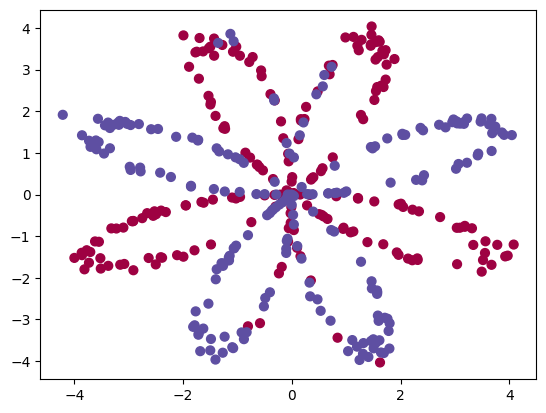

In [2]:
#Package imports 
import numpy as np 
import matplotlib.pyplot as plt 
# here planar_utils.py can be found on its github repo 
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset 
# Loading the Sample data 
X, Y = load_planar_dataset() 
  
# Visualize the data: 
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral); 

**Plotting the Data**: 
   ```bash
   plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
   plt.show()
   ```
   - `plt.scatter()`: This function creates a scatter plot.
     - `X[0, :]`: The x-coordinates of the data points.
     - `X[1, :]`: The y-coordinates of the data points.
     - `c=Y`: The color of each point is determined by the corresponding value in `Y`.
     - `s=40`: The size of each point.
     - `cmap=plt.cm.Spectral`: The color map used to map the `Y` values to colors.

   - `plt.show()`: This function displays the plot.

__Step 2 :__ Initializing Weight and bias matrix :

Number of hidden units(neurons) is '__4__', so, the W1 weight matrix will be of shape __(4, number of features)__ and bias matrix will be of shape __(4, 1)__. Where 4 is the hidden units(neurons) and 1 is the number of bias terms for each unit in the hidden layer. which after broadcasting will add up to the weight matrix according to the above formula. Same can be applied to the W2.

In [3]:
# X --> input dataset of shape (input size, number of examples) 
# Y --> labels of shape (output size, number of examples) 

W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape =(4, 1)) 

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1)) 


__`Result`__

- __Weight Matrix__ '__W1__' : Connect input layer to the hidden layer.

- __Bias Vector__ '__b1__' : Provide a bias term of each neuron in the hidden layer. 

- __Weight Matrix__ '__W2__' :: Connect the hidden layer to the output layer. 

- __Bias Vector__ '__b1__' : Provide a bias term for each output unit.

__Step 3 :__ `Forward Propagation :` Now we will perform the forward propagation using the W1, W2 and the bias b1, b2.

In [31]:
def forward_propagation(X, W1, W2, b1, b2):
    global cache
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1" : Z1,
             "A1" : A1,
             "Z2" : Z2,
             "A2" : A2}
    
    return A2, cache

```bash
Z1 = np.dot(W1, X) + b1
```
- X --> `Input`

- Adding bias b1 in `Z1 = np.dot(W1, X) + b1` allows each neuron to adjust its activation threshold, providing greater flexibility and improving the model's ability to learn complex patterns.

- **`cache`**: Dictionary containing intermediate values (`Z1`, `A1`, `Z2`, `A2`) for later use in backpropagation.

__Forward Propagation :__ To compute the output of the neural network and assess the prediction for a given input.

__Backpropagation :__ To update the weights and biases of the neural network by minimizing the loss function.

__Step 4 :__ Defining the cost function :

In [32]:
def compute_cost (A2, Y):
    global m
    
    m = Y.shape[1]

    cost_sum = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = -np.sum(cost_sum) / m
    cost = np.squeeze(cost)

    return cost

`Here,`

- `A2:` Predicted probabilities (output of the neural network).
- `Y:` Actual labels.

- `m = Y.shape[1] :` gets the number of examples (data points) from the second dimension of Y, which is necessary for calculating the average cost across all examples.

- `cost_sum :` Cross-entropy loss function formula.

- `cost = -np.sum(cost_sum) / m :` 
    * `np.sum(cost_sum):` Sums the values in cost_sum across all examples.
    * `-np.sum(cost_sum) / m:` Computes the average cost over all examples.

- `cost = np.squeeze(cost) :`  Converts 'cost` to a scalar by removing any unnecessary dimensions.


__Step 5 :__ Back-propagating function:

In [41]:
learning_rate = 0.01
def backward_propagation(W1, b1, W2, b2): 

	# Retrieve also A1 and A2 from dictionary "cache" 
	A1 = cache['A1'] 
	A2 = cache['A2'] 

	# Backward propagation: calculate dW1, db1, dW2, db2. 
	dZ2 = A2 - Y 
	dW2 = (1 / m) * np.dot(dZ2, A1.T) 
	db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True) 

	dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) 
	dW1 = (1 / m) * np.dot(dZ1, X.T) 
	db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True) 
	
	# Updating the parameters according to algorithm 
	W1 = W1 - learning_rate * dW1 
	b1 = b1 - learning_rate * db1 
	W2 = W2 - learning_rate * dW2 
	b2 = b2 - learning_rate * db2 

	return W1, W2, b1, b2



### Purpose:
- **Perform backpropagation** to compute gradients of the loss function with respect to the weights and biases, and update these parameters to minimize the loss.

### Steps:

1. **Retrieve Cached Values**:
   ```python
   A1 = cache['A1']
   A2 = cache['A2']
   ```
   - Retrieves the activations from the hidden and output layers stored in `cache`.

2. **Compute Gradients for Output Layer**:
   - **Error in Output Layer**:
     ```python
     dZ2 = A2 - Y
     ```
     - Computes the difference between predicted values (`A2`) and actual labels (`Y`).

   - **Gradient for Weights `W2`**:
     ```python
     dW2 = (1 / m) * np.dot(dZ2, A1.T)
     ```
     - Calculates the gradient of the weights connecting the hidden layer to the output layer.

   - **Gradient for Biases `b2`**:
     ```python
     db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
     ```
     - Calculates the gradient of the biases in the output layer.

3. **Compute Gradients for Hidden Layer**:
   - **Error in Hidden Layer**:
     ```python
     dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
     ```
     - Computes the gradient of the activation function using the chain rule.

   - **Gradient for Weights `W1`**:
     ```python
     dW1 = (1 / m) * np.dot(dZ1, X.T)
     ```
     - Calculates the gradient of the weights connecting the input layer to the hidden layer.

   - **Gradient for Biases `b1`**:
     ```python
     db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
     ```
     - Calculates the gradient of the biases in the hidden layer.

4. **Update Parameters**:
   - **Update Weights and Biases**:
     ```python
     W1 = W1 - learning_rate * dW1
     b1 = b1 - learning_rate * db1
     W2 = W2 - learning_rate * dW2
     b2 = b2 - learning_rate * db2
     ```
     - Adjusts the weights and biases using the computed gradients and a learning rate.

5. **Return Updated Parameters**:
   ```python
   return W1, W2, b1, b2
   ```

### Summary:

- **Backpropagation** computes gradients of the loss function with respect to the weights and biases for both layers.
- **Parameter Updates**: The gradients are used to update the weights and biases to minimize the loss.
- The function returns the updated weights and biases after applying the gradients and learning rate.

__Step 6 :__ Now we will train the model using the functions defined above, the epochs can be put as per the convenience and power of the processing unit.

In [39]:
num_iterations = 10001
learning_rate = 0.01
print_cost = True

# Please note that the weights and bias are global 
# Here num_iteration is epochs 
for i in range(0, num_iterations): 
	
		# Forward propagation. Inputs: "X, parameters". return: "A2, cache". 
		A2, cache = forward_propagation(X, W1, W2, b1, b2) 
		
		# Cost function. Inputs: "A2, Y". Outputs: "cost". 
		cost = compute_cost(A2, Y) 

		# Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads". 
		W1, W2, b1, b2 = backward_propagation(W1, b1, W2, b2) 
		
		# Print the cost every 1000 iterations 
		if print_cost and i % 1000 == 0: 
			print ("Cost after iteration % i: % f" % (i, cost)) 


Cost after iteration  0:  0.329697
Cost after iteration  1000:  0.327536
Cost after iteration  2000:  0.325591
Cost after iteration  3000:  0.323827
Cost after iteration  4000:  0.322216
Cost after iteration  5000:  0.320736
Cost after iteration  6000:  0.319368
Cost after iteration  7000:  0.318099
Cost after iteration  8000:  0.316915
Cost after iteration  9000:  0.315808
Cost after iteration  10000:  0.314768


__Step 7 :__ Make Predictions:

In [46]:
def predict_decision_boundary(X):
    A2, _ = forward_propagation(X.T, W1, W2, b1, b2)
    predictions = (A2 > 0.5)  # Apply threshold to get binary output
    return predictions.T  # Transpose back to match original shape

__Step 7 :__ Plot Decision Boundary:

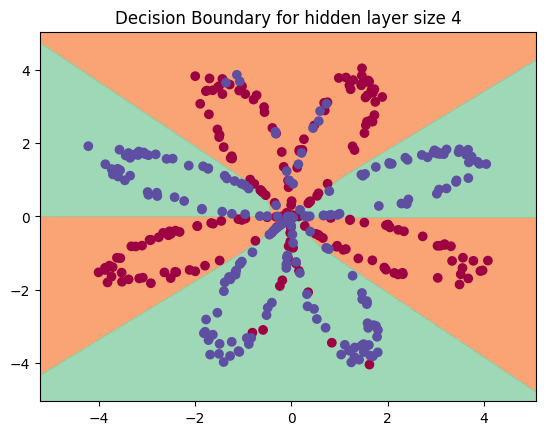

In [47]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])  # Flatten and stack grid points
    Z = Z.reshape(xx.shape)  # Reshape to match the mesh grid

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size 4")
    plt.show()

# Plot the decision boundary using the updated function
plot_decision_boundary(lambda x: predict_decision_boundary(x), X, Y)
